<a href="https://colab.research.google.com/github/linusms/Hands-on/blob/main/chapter_8_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 그냥 랜덤 포레스트 적용과 PCA 사용 후 랜덤 포레스트 적용 비교 

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)


X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [2]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import time


rnd_clf=RandomForestClassifier(random_state=42)

t1=time.time()
rnd_clf.fit(X_train, y_train)
t2=time.time()
print('걸린 시간:', t2-t1)

y_pred=rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

걸린 시간: 41.35986304283142
0.9705


In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)

# 항상 주의. 테스트 세트는 fit_transform이 아닌 transform
# 훈련 세트에서 변환했던 방법(변환 계수) 그대로 변환해야 하기 때문
X_test_reduced=pca.transform(X_test)

In [6]:
# PCA를 써서 차원축소 했는데 시간이 오히려 더 오래 걸림
# 차원 축소가 항상 시간 단축하는 것은 아니고, 
# 데이터셋(p.280 확인), 사용하는 모델, 알고리즘에 따라 다름

rnd_clf2=RandomForestClassifier(random_state=42)

t1=time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t2=time.time()
print('걸린 시간:', t2-t1)

y_pred=rnd_clf2.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

걸린 시간: 121.7697434425354
0.9481


In [7]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t1 = time.time()
log_clf.fit(X_train, y_train)
t2 = time.time()

print('걸린 시간:', t2-t1)

y_pred=log_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

걸린 시간: 28.50743842124939
0.9255


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# 정확도는 다소 떨어졌지만, 매우 빨라진 학습 속도

log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t1 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t2 = time.time()

print('걸린 시간:', t2-t1)

y_pred=log_clf2.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

걸린 시간: 10.70467495918274
0.9201


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# t-SNE를 이용해 MNIST 축소 후 그래프 그려보기
# 60000개의 훈련 데이터셋을 10000개로 축소(시간 오래 걸리므로)

import numpy as np

np.random.seed(42)

idx = np.random.permutation(60000)[:10000]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [89]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
t1 = time.time()
X_reduced = tsne.fit_transform(X)
t2 = time.time()
print('걸린 시간:', t2-t1)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


걸린 시간: 76.81699919700623


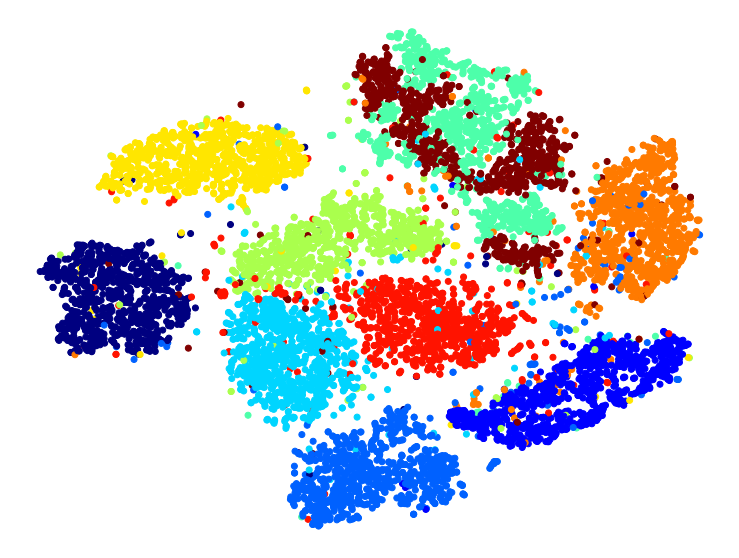

In [91]:
# 각 샘플이 가지는 레이블의 종류(0~9)를 색으로 가진 산점도  

import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
# y 자료형을 숫자로 바꿔주어야 동작함
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=list(map(lambda x: int(x),y)), cmap="jet")
plt.axis('off')
plt.show()

# 0,6,8은 딱 봐도 잘 분리되어있음
# 4,9는 아주 많이 겹쳐있어 판별하기 어려워하는 것을 알 수 있음
# 3,5도 약간 겹쳐있어 이것에 대해 집중적으로 분석

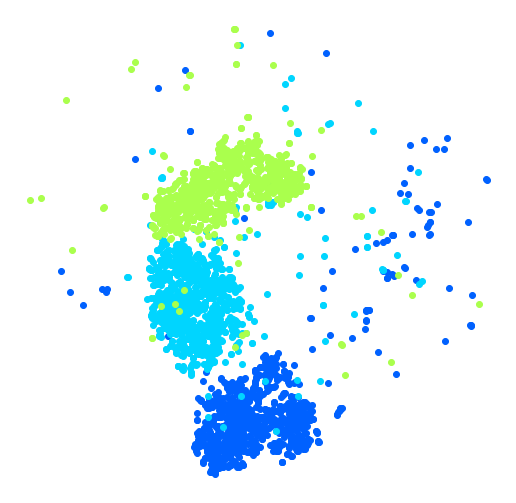

In [38]:
# 살짝 겹쳐있는 그래프에 대해서 산점도 그려보기 [cmap(digit / 9)]

import matplotlib as mpl
y_digit=np.array(list(map(lambda x: int(x),y)),int)


plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
  # digit/9로 색을 나누는 이유. 산점도를 한번에 그리는 게 아니라 여러 번 반복해 그리기 때문에
  # cmap에 미리 존재하는 숫자/9로 색을 지정하지 않으면 기본 색으로 색 지정됨
    plt.scatter(X_reduced[np.where(y_digit== digit), 0], X_reduced[np.where(y_digit == digit), 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

In [68]:
# t-sne로 레이블이 5,2,3인 샘플들만 차원축소

from numpy import where

y_array=np.array(list(map(lambda x: int(x),y)))
y_idx=np.hstack((where(y_array==5)[0],  where(y_array==2)[0] , where(y_array==3)[0]),)
print(y_idx)
  
X_subset = X[y_idx]
y_subset = y[y_idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

[   8   11   25 ... 9985 9988 9993]


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


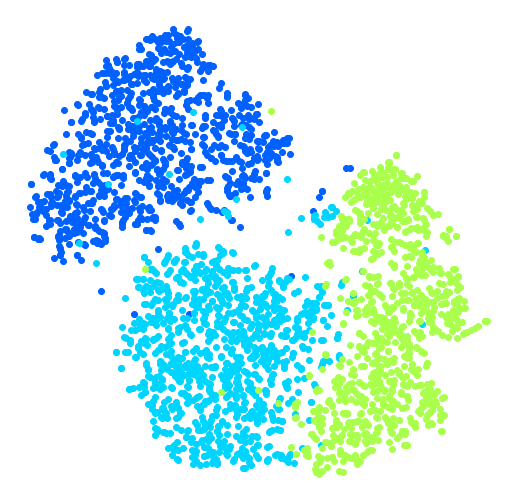

In [69]:
# 3 종류(즉, 3개의 레이블 종류를 가지는) 샘플들로만 t-sne를 적용하니
# 앞서 그냥 그린 산점도보다 잘 분리되어 그려진 것을 볼 수 있음

plt.figure(figsize=(9,9))

y_subset_digit=np.array(list(map(lambda x: int(x),y_subset)))

for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[where(y_subset_digit == digit), 0], X_subset_reduced[where(y_subset_digit == digit), 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

걸린 시간:  0.665308952331543


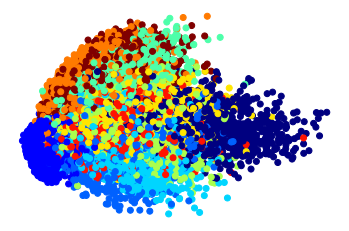

In [76]:
# PCA 적용해서 산점도 그리기
# 빠르지만, 효과 별로

from sklearn.decomposition import PCA


t1 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.scatter(X_pca_reduced[: ,0], X_pca_reduced[: ,1], c=list(map(lambda x: int(x),y)), cmap="jet")
plt.axis(False)
plt.show()

걸린 시간:  21.584001302719116


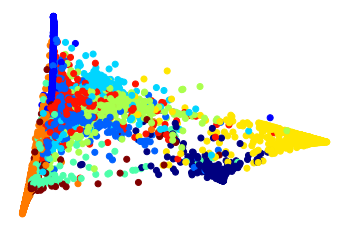

In [77]:
# 차원축소 방법으로 LLE 사용 
# 꽤 오래 걸리고, 효과도 좋지 않음

from sklearn.manifold import LocallyLinearEmbedding

t1 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.scatter(X_lle_reduced[: ,0], X_lle_reduced[: ,1], c=list(map(lambda x: int(x),y)), cmap="jet")
plt.axis(False)
plt.show()


걸린 시간:  18.20454502105713


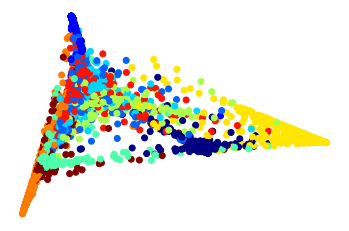

In [78]:
# PCA+LLE 조합
# 시간은 조금 줄어들었지만, 여전히 잘 분리되지 않았음

from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

t1 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.scatter(X_pca_lle_reduced[: ,0], X_pca_lle_reduced[: ,1], c=list(map(lambda x: int(x),y)), cmap="jet")
plt.axis(False)
plt.show()

걸린 시간:  99.43887639045715


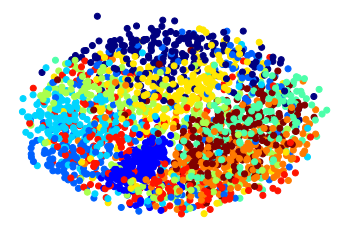

In [81]:
# 시간 오래 걸리므로 2000개에 대해서만 실행
# 차원축소 방법으로 MDS 적용
# 엄청 오래 걸리고, 분리도 좋지 않음

from sklearn.manifold import MDS

t1 = time.time()
X_MDS_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:2000])
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.scatter(X_MDS_reduced[: ,0], X_MDS_reduced[: ,1], c=list(map(lambda x: int(x),y[:2000])), cmap="jet")
plt.axis(False)
plt.show()

걸린 시간:  100.52493286132812


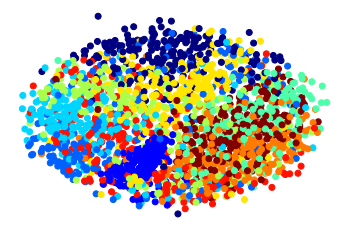

In [82]:
# PCA+MDS도 오히려 증가한 시간에 비슷한 성능

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])


t1 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.scatter(X_pca_mds_reduced[: ,0], X_pca_mds_reduced[: ,1], c=list(map(lambda x: int(x),y[:2000])), cmap="jet")
plt.axis(False)
plt.show()

걸린 시간:  2.517225742340088


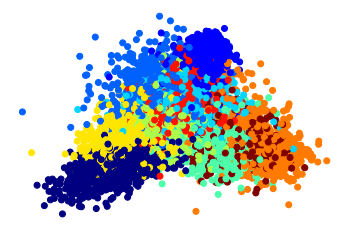

In [86]:
# 차원축소 방법에 LDA 사용
# 엄청 빠르고, 분리 성능도 그나마 낫지만 아쉽

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t1 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,y)
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.scatter(X_lda_reduced[: ,0], X_lda_reduced[: ,1], c=list(map(lambda x: int(x),y)), cmap="jet")
plt.axis(False)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


걸린 시간:  77.87260246276855


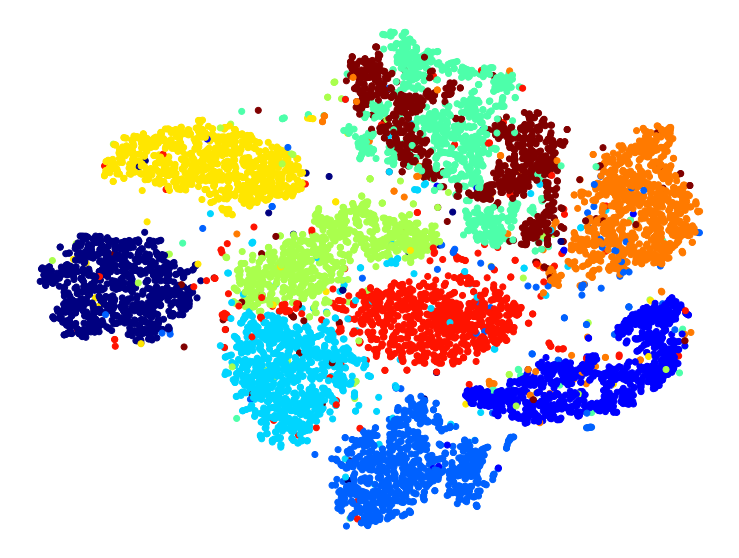

In [90]:
# PCA+t-sne 방법 사용
# 적당히 빠르고 성능이 가장 좋다
# 질문: 근데 굳이 PCA를 같이 사용해야 성능이 좋아지는진 모르겠다
# 위 그래프와 비교해도 크게 차이 없는 거 같다. 시간만 늘었지...

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

t1 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t2 = time.time()
print("걸린 시간: ", t2 - t1)
plt.figure(figsize=(13,10))
plt.scatter(X_pca_tsne_reduced[: ,0], X_pca_tsne_reduced[: ,1], c=list(map(lambda x: int(x),y)), cmap="jet")
plt.axis(False)
plt.show()